<a href="https://colab.research.google.com/github/linhvien/Data-Visualization-with-Python/blob/main/Matplotlib_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math

#Setting styles

In [5]:
plt.style.available
plt.style.use('classic')

    %matplotlib notebook  #will lead to interactive plots embedded within the notebook

    %matplotlib inline #will lead to static images of your plot embedded in the notebook

Linestyle
       # For short, you can use the following codes:
       plt.plot(x, y, linestyle='-')  # solid
       plt.plot(x, y, linestyle='--') # dashed
       plt.plot(x, y, linestyle='-.') # dashdot
       plt.plot(x, y, linestyle=':');  # dotted

Color
       # For short, you can use the following codes:
    plt.plot(x, y, color='blue')#specify color by name
    plt.plot(x, y, color='g')# short color code (rgbcmyk)
    plt.plot(x, y, color='0.75')# Grayscale between 0 and 1
    plt.plot(x, y, color='#FFDD44')# Hex code (RRGGBB from 00 to FF)
    plt.plot(x, y, color=(1.0,0.2,0.3))# RGB tuple, values 0 and 1
    plt.plot(x, y, color='chartreuse'); # all HTML color names supported

#Pyplot API
Pyplot is a plotting library used for 2D graphics in python programming language

''

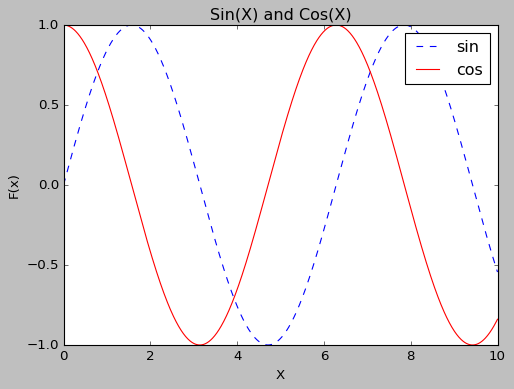

In [ ]:
#Draw two line charts in the same plot
x = np.linspace(0, 10, 1000)
plt.figure(2,figsize=(7,5))
plt.plot(x,np.sin(x),color='blue',linestyle='dashed',label='sin')
plt.plot(x,np.cos(x),color='red',label='cos')
plt.title("Sin(X) and Cos(X)")
plt.xlabel("X");
plt.ylabel("F(x)")
plt.legend()
#plt.axis(xmin, xmax, ymin, ymax) #tự căn chỉnh độ dài trục
#plt.axis('tight') #căn chỉnh trục vừa khít khung hình
#plt.axis('equal') #căn chỉnh trục theo ratio
;

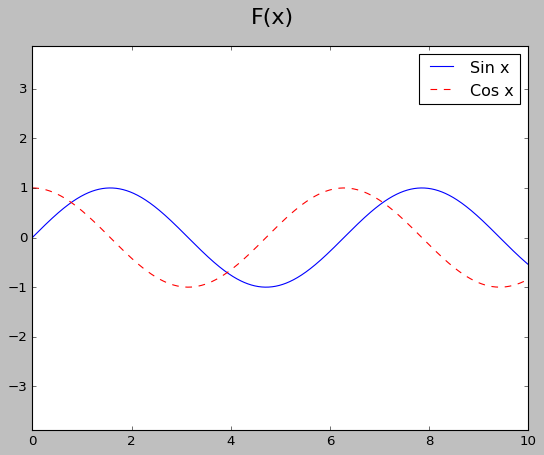

In [ ]:
#Cách khác
fig = plt.figure()
fig.suptitle('F(x)',size=20)
sin, = plt.plot(x, np.sin(x), '-b', label='Sin x')
cos, = plt.plot(x, np.cos(x), '--r',label='Cos x')
plt.axis('equal')
plt.legend(handles=[sin, cos])
plt.show()

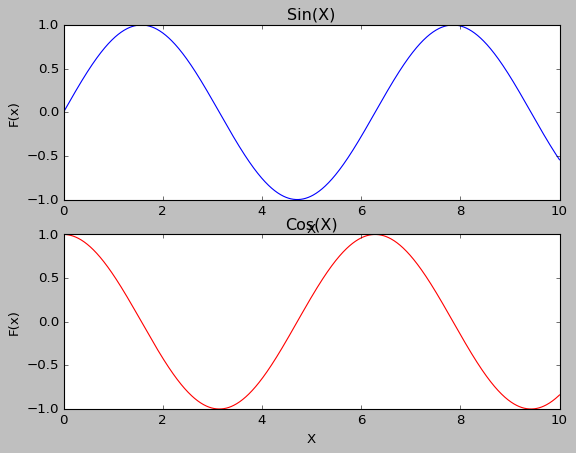

In [ ]:
# create the first of two panels and set current axis
plt.subplot(211) # (rows, columns, index)
plt.plot(x, np.sin(x))
plt.title('Sin(X)')
plt.xlabel('X');
plt.ylabel('F(x)')

# create the second panel and set current axis
plt.subplot(212)
plt.plot(x, np.cos(x),color='red')
plt.title('Cos(X)')
plt.xlabel('X');
plt.ylabel('F(x)');

#Object Oriented API
The object-oriented API is recommended for more complex plots
While most plt functions translate directly to ax methods (such as plt.plot() → ax.plot(), plt.legend() → ax.legend(), etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

    plt.xlabel() → ax.set_xlabel()
    plt.ylabel() → ax.set_ylabel()
    plt.xlim() → ax.set_xlim()
    plt.ylim() → ax.set_ylim()
    plt.title() → ax.set_title() 
In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ax.set()
    
    ax.set(xlim=(0, 10), ylim=(-2, 2), 
    xlabel='x', ylabel='sin(x)',
    title='A Simple Plot');

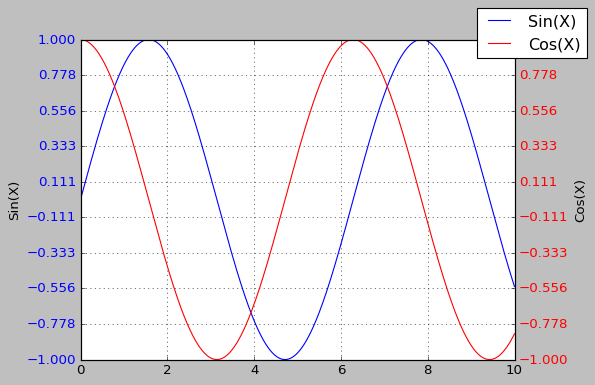

In [ ]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("Sin(X)")
ax1.plot(x, np.sin(x), "blue")
#the operator * acts as an unpacking operator when prepended before a list or tuple
#np.linspace method to divide the interval between the maximum and minimum tick values into 10 equal parts
ax1.set_yticks(np.linspace(*ax1.get_ybound(), 10)) 
ax1.tick_params(axis="y", labelcolor="blue")
ax1.xaxis.grid()
ax1.yaxis.grid()

ax2 = ax1.twinx() # create another y-axis sharing a common x-axis
ax2.set_ylabel("Cos(X)")
ax2.plot(x, np.cos(x), "red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_yticks(np.linspace(*ax2.get_ybound(), 10))

fig.legend(["Sin(X)", "Cos(X)"])
fig.set_size_inches(7,5)
plt.show()

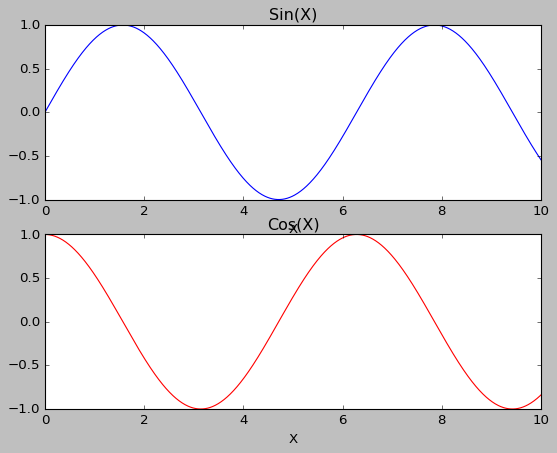

In [ ]:
#Kiểu viết ax khác
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Draw two charts in two separate plots
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x),color='red')
ax[0].set(title='Sin(X)',xlabel='X')
ax[1].set(title='Cos(X)',xlabel='X');

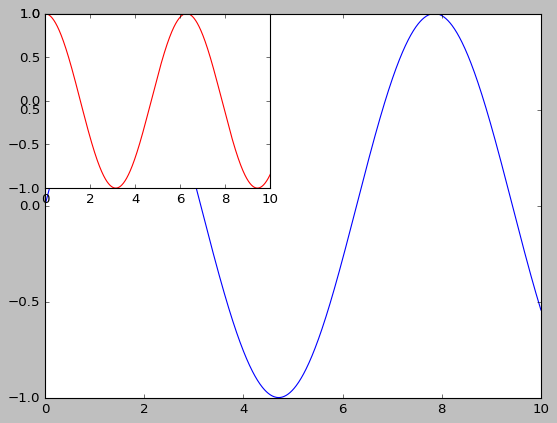

In [ ]:
#Use add_subplot to overwrite the existing plot
#add_subplot() function doesn’t provide the option to put the axes at a certain position
fig = plt.figure()
ax1 = fig.add_subplot(111) # (rows, columns, index)
ax1.plot(x, np.sin(x))
ax2 = fig.add_subplot(221)
ax2.plot(x, np.cos(x),color='red');

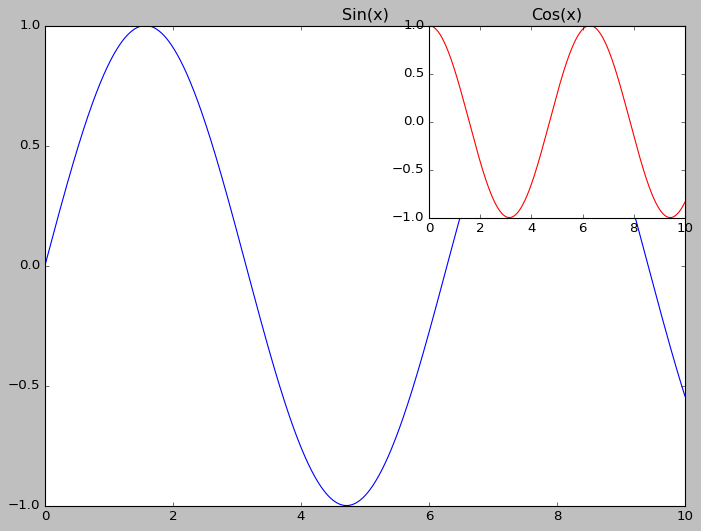

In [ ]:
#Cách khác
#Insert plot in the same figure by adding another axes object
#In cases where the positioning matters, you’ll resort to add_axes()
fig=plt.figure()
axes1 = fig.add_axes ([0.1, 0.1, 1, 1]) # main axes [left, bottom, width, height]
axes2 = fig.add_axes([0.7, 0.7, 0.4, 0.4]) # inset axes [left, bottom, width, height] 
axes1.plot(x, np.sin(x), 'blue')
axes2.plot(x,np.cos(x),'red')
axes1.set_title('Sin(x)')
axes2.set_title('Cos(x)')
plt.show()

#PRACTICE 1: IRIS DATASET

In [2]:
# Get sample data from Skcit
# This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica). The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
species = iris.target_names
df = pd.DataFrame(X,y,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df = df.rename(index={0:'Setosa',1:'Versicolour',2:'Virginica'})
df.reset_index(level=0,inplace=True)
df.rename(columns={'index':'Species'},inplace=True)
df

,Species,Sepal Length,Sepal Width,Petal Length,Petal Width
0,Setosa,5.1,3.5,1.4,0.2
1,Setosa,4.9,3.0,1.4,0.2
2,Setosa,4.7,3.2,1.3,0.2
3,Setosa,4.6,3.1,1.5,0.2
4,Setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,Virginica,6.7,3.0,5.2,2.3
146,Virginica,6.3,2.5,5.0,1.9
147,Virginica,6.5,3.0,5.2,2.0
148,Virginica,6.2,3.4,5.4,2.3


##Line plots

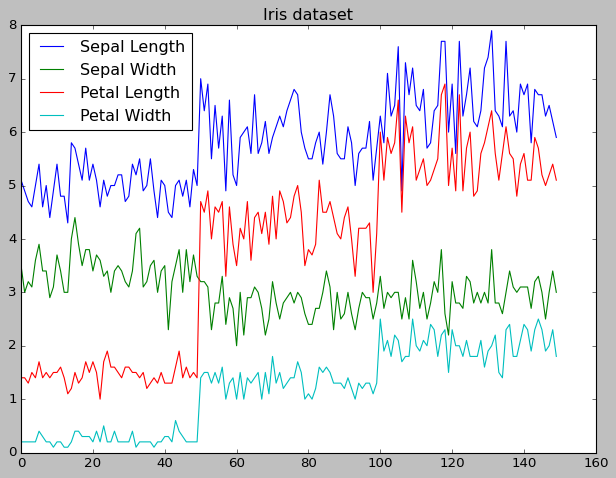

In [6]:
measures = df.iloc[:,1:] #excluding species column
#OO API
fig, ax = plt.subplots()
fig.tight_layout()
for measure in measures:
  ax.plot(range(0,len(df)),df[measure],label=measure)
ax.set_title('Iris dataset')
ax.legend(loc='upper left');

##Bar plots

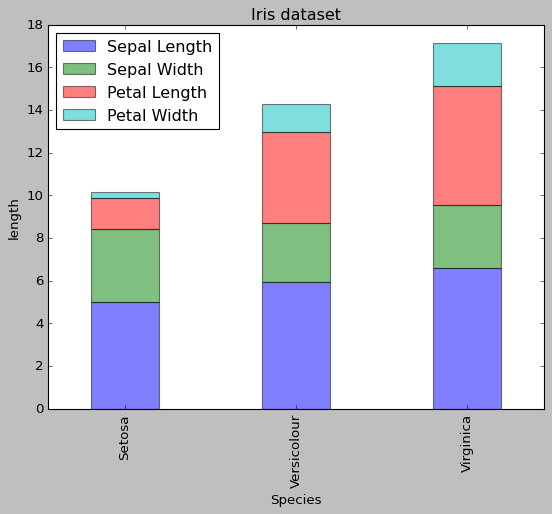

In [ ]:
sepal_length = df.groupby('Species')['Sepal Length'].mean()
sepal_width = df.groupby('Species')['Sepal Width'].mean()
petal_length = df.groupby('Species')['Petal Length'].mean()
petal_width = df.groupby('Species')['Petal Width'].mean()
data = pd.concat([sepal_length, sepal_width, petal_length, petal_width], axis=1).reset_index()
#Pyplot API
##Stacked bar chart
data.plot.bar(x='Species', y=['Sepal Length','Sepal Width','Petal Length','Petal Width'],  stacked=True,  width = 0.4,alpha=0.5) 

plt.title('Iris dataset')
plt.xlabel('Species')
plt.ylabel('length')  

plt.show()

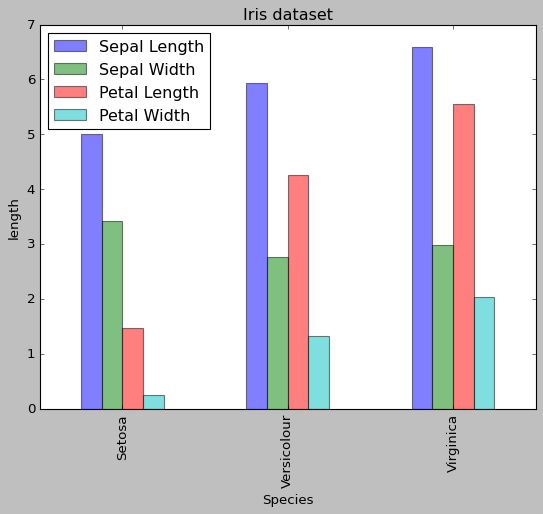

In [ ]:
#OO API
## Grouped bar chart
ax = data.set_index('Species').plot(kind="bar",alpha=0.5)

plt.title('Iris dataset')
plt.xlabel('Species')
plt.ylabel('length')  

plt.show()

##Scatter plots

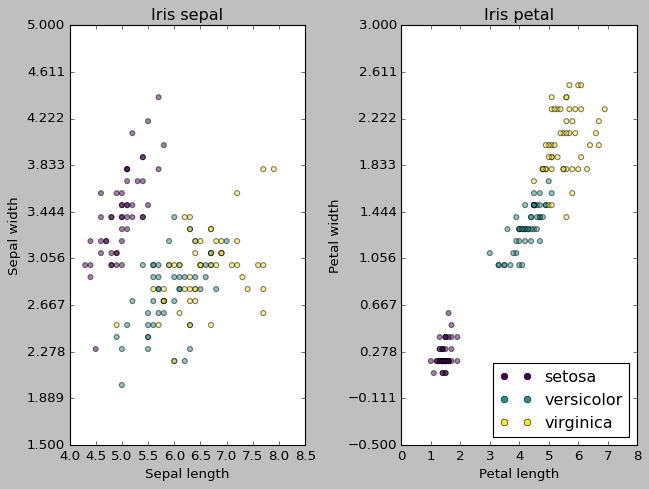

In [ ]:
# OO API
fig,ax = plt.subplots(1,2, constrained_layout=True)
ax[0].scatter(df['Sepal Length'], df['Sepal Width'], c=iris.target
                 , cmap='viridis',alpha=0.5)
ax[0].set(title='Iris sepal',xlabel='Sepal length',ylabel='Sepal width')
ax[0].set_yticks(np.linspace(*ax[0].get_ybound(), 10)) 

ax[1].scatter(df['Petal Length'], df['Petal Width'], c=iris.target
                 , cmap='viridis',alpha=0.5)
ax[1].set(title='Iris petal',xlabel='Petal length',ylabel='Petal width')
ax[1].set_yticks(np.linspace(*ax[1].get_ybound(), 10)) 

#Create a legend for iris types
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(y.min(), y.max())
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(species)]
plt.legend(handles=handles,loc='lower right')
plt.show();


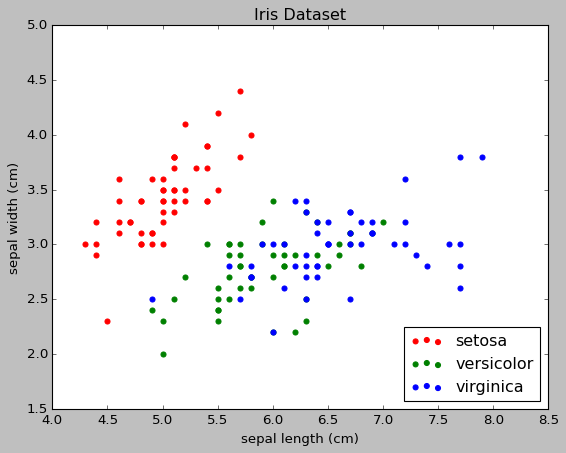

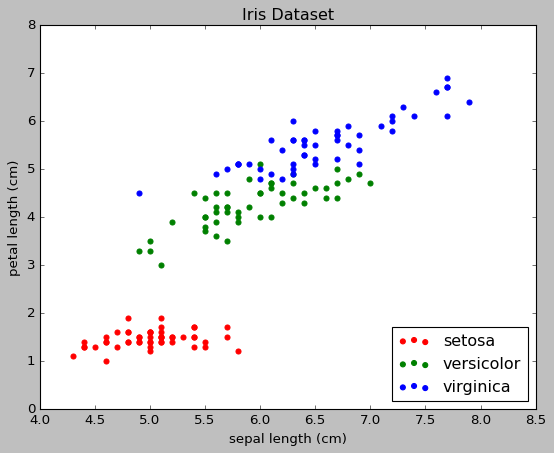

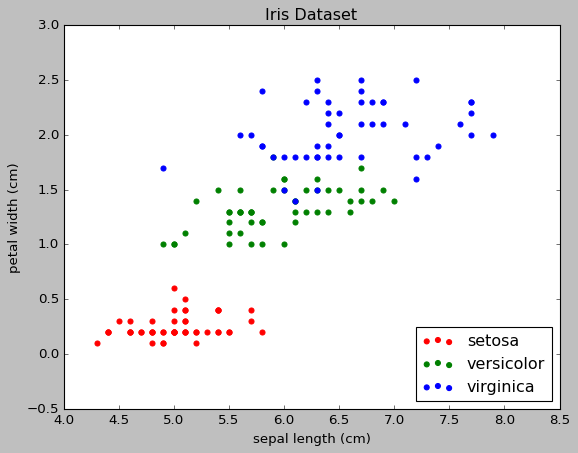

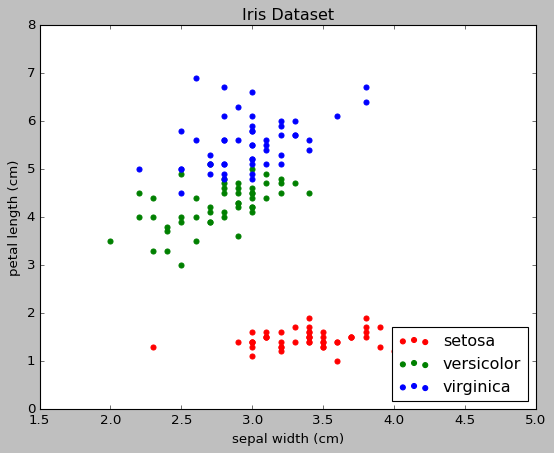

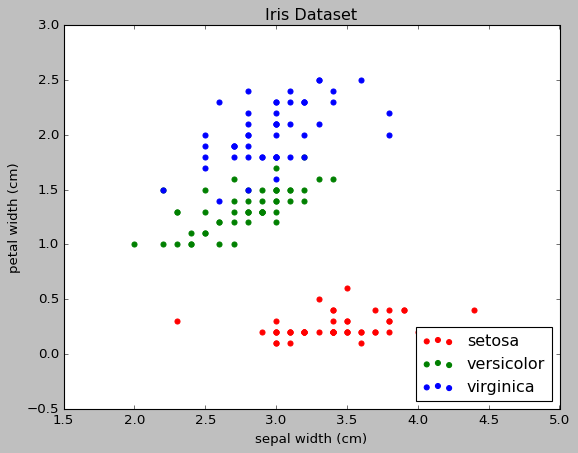

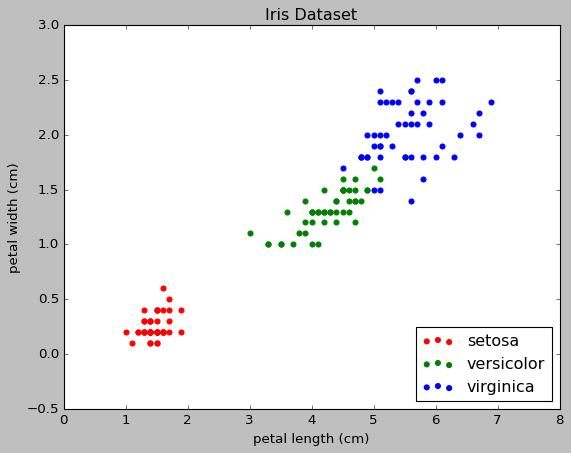

In [ ]:
#Cách khác để vẽ nhiều scatter plot cho nhiều attributes của các species theo cặp
#Pyplot API
def plot_iris(f1, f2):
    n_samples = len(df['Species'])
    for t in set(iris.target):
        x = [iris.data[i,f1] for i in range(n_samples) if iris.target[i]==t]
        y = [iris.data[i,f2] for i in range(n_samples) if iris.target[i]==t]
        plt.scatter(x,
                    y,
                    color=['red', 'green', 'blue'][t],
                    label=iris.target_names[t])
    plt.xlabel(iris.feature_names[f1])
    plt.ylabel(iris.feature_names[f2])
    plt.title('Iris Dataset')
    plt.legend(iris.target_names, loc='lower right')
    plt.show()

n_features = len(iris.feature_names)
pairs = [(i, j) for i in range(n_features) for j in range(i+1, n_features)]

for (f1, f2) in pairs:
    plot_iris(f1, f2)


##Box plot

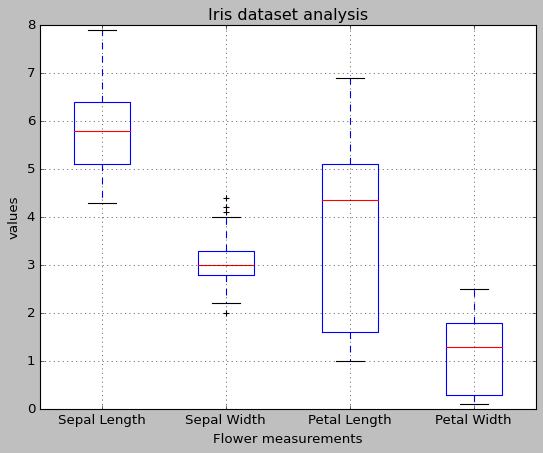

In [ ]:
measures.boxplot()
plt.xlabel('Flower measurements')
plt.ylabel('values')
plt.title("Iris dataset analysis")
plt.show()

##Histogram plots

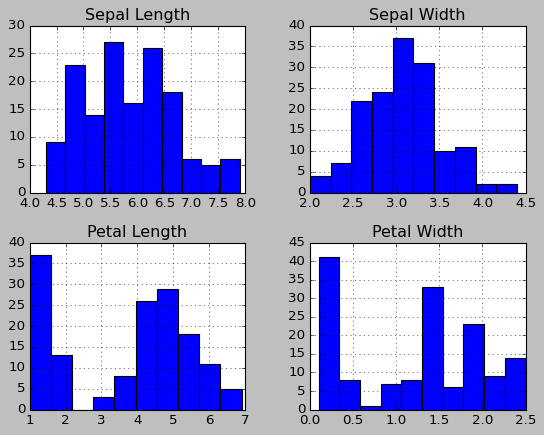

In [7]:
measures.hist(bins=10);

#PRACTICE 2: SALE REPORT

Get data from local files

    path = '/Users/admin/Desktop/Python_MacPro/sales_reporting/data_analytics_problems/SalesAnalysis/Sales_Data/'
    frames = []
    all_length = []
    for file in os.listdir(path):
        if file.endswith('.csv'):
            filepath = path + file
            df1 = pd.read_csv(filepath)
            frames.append(df1)
            result = pd.concat(frames)
            length_1month = len(df1.index)
            all_length.append(length_1month)

    result.to_csv('annualSales2019.csv', index=False)

In [ ]:
#Get data from Github
dfs = []
months = range(1,13)
for i in months:
  path = 'https://raw.githubusercontent.com/linhvien/Data-Visualization-with-Python/main/Dataset/sales2019%20store%20data/sales2019_'+str(i)+'.csv'  
  dfs.append(pd.read_csv(path, index_col=None, header=0))
fulldata = pd.concat(dfs, axis=0, ignore_index=True)

#Remove NA and duplicates
fulldata.sort_values(['Order ID']).reset_index(drop=True).dropna()
fulldata.drop_duplicates( keep = False, inplace = True)
#//dupl= fulldata[fulldata['Order ID'].str.contains('Order ID')]
#//fulldata = fulldata.drop(dupl.index)

#Convert date
fulldata['Order Date'] = fulldata.apply(lambda x: '{}-{}-{} {}'.format(2019,x['Order Date'].split('/',2)[0], x['Order Date'].split('/',2)[1], x['Order Date'].split(' ')[1]), axis=1)
fulldata['Order Date'] = pd.to_datetime(fulldata['Order Date'], format='%Y-%m-%d %H:%M')
#//fulldata['Order Date'] = fulldata['Order Date'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M")) #Cách convert date khác
fulldata['Month']=fulldata['Order Date'].dt.month
fulldata['Hour']=fulldata['Order Date'].dt.hour
#Add sales
fulldata['Order ID']=fulldata['Order ID'].astype('int64')
fulldata['Quantity Ordered']=fulldata['Quantity Ordered'].astype('int64')
fulldata['Price Each']=fulldata['Price Each'].astype('float')
#//fulldata['Price Each'] = pd.to_numeric(fulldata['Price Each'], downcast='float') #Cách convert type khác
fulldata['Sale']=fulldata['Quantity Ordered']*fulldata['Price Each']

#Reorder columns
fulldata.insert(4, 'Sale',fulldata.pop('Sale'))
fulldata.insert(6,'Month',fulldata.pop('Month'))
fulldata.insert(7,'Hour',fulldata.pop('Hour'))
fulldata.tail()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Month,Hour,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11 20:58:00,12,20,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01 12:01:00,12,12,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,400.00,2019-12-09 06:43:00,12,6,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,11.99,2019-12-03 10:39:00,12,10,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,99.99,2019-12-21 21:45:00,12,21,"747 Chestnut St, Los Angeles, CA 90001"


In [ ]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185422 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185422 non-null  int64         
 1   Product           185422 non-null  object        
 2   Quantity Ordered  185422 non-null  int64         
 3   Price Each        185422 non-null  float64       
 4   Sale              185422 non-null  float64       
 5   Order Date        185422 non-null  datetime64[ns]
 6   Month             185422 non-null  int64         
 7   Hour              185422 non-null  int64         
 8   Purchase Address  185422 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 14.1+ MB


##The best month for sales

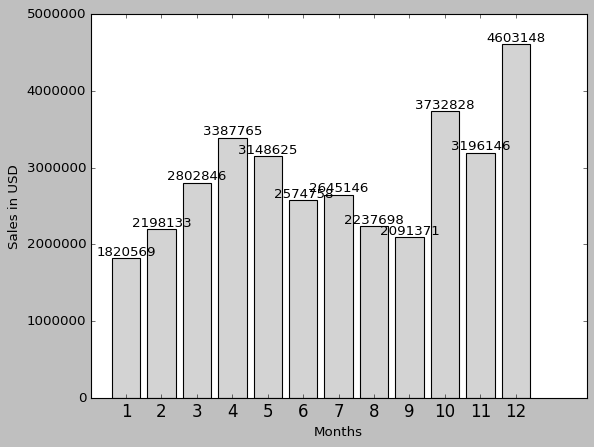

In [ ]:
#Pyplot API
sales = fulldata.groupby('Month')['Sale'].sum()
plt.bar(x=months, height=sales,color='lightgray',edgecolor='black')
plt.rcParams['figure.figsize'] = (25,15)
plt.xticks(months, size =15)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
#Adding value label for each bar
for i in range (1,len(months)+1):
  plt.text(i,sales[i],sales[i].astype('int64'),ha='center',va='bottom',size=12) 
plt.show()

##The city has the best sale

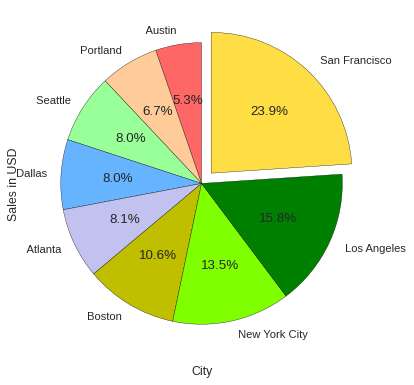

In [ ]:
#Pyplot API
fulldata['City'] = fulldata.apply(lambda x: x['Purchase Address'].split(',')[1],axis=1)
sales = fulldata.groupby('City')['Sale'].sum().sort_values(ascending = True)
cities = [city for city,sales in sales.items()] #list comprehension
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff','#c2c2f0','y','chartreuse','g','#FFDD44']
explode = (0,0,0,0,0,0,0,0,0.1)
plt.pie(x=sales,labels= cities, startangle = 90, autopct='%1.1f%%',colors=colors,explode=explode)
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()


##The best sold-out time 

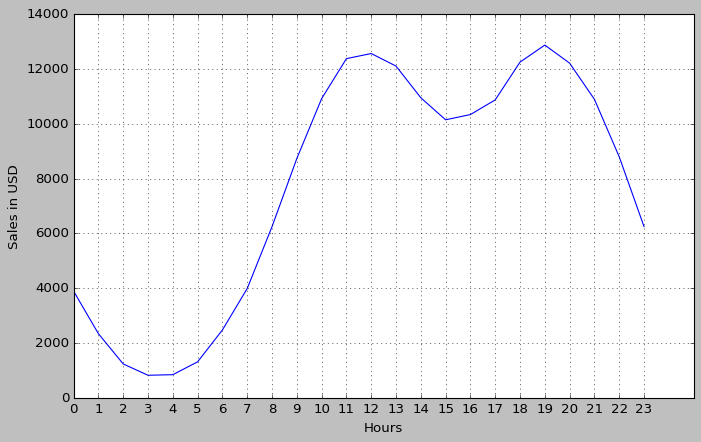

In [ ]:
hour_sale = fulldata.groupby('Hour')['Sale'].count()
hours = [hour for hour,sale in hour_sale.items()]
plt.rcParams['figure.figsize'] = (10,6)
plt.plot(hours, hour_sale)
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

##The most ordered products

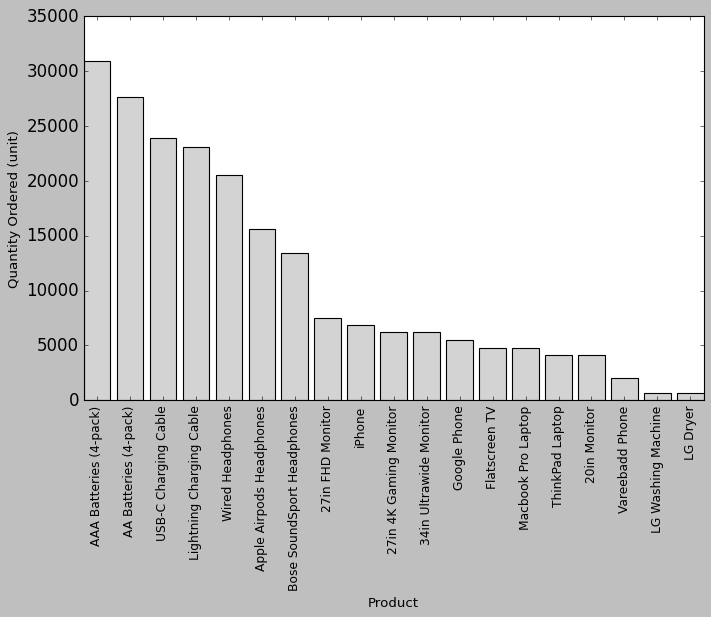

In [ ]:
#Pyplot API
order = fulldata.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False)
product = [product for product, order in order.items()]
most_order = plt.bar(x=product, height=order,color='lightgray',edgecolor='black')
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(product, size=11, rotation=90)
plt.yticks(size=15)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered (unit)')
plt.show();

Text(0, 0.5, 'Price')

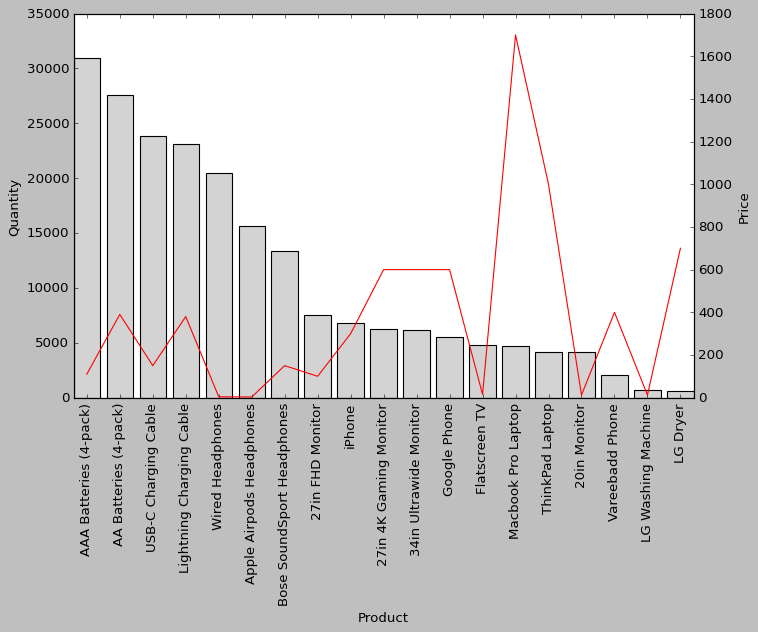

In [ ]:
#Price
price = fulldata.groupby('Product')['Price Each'].mean()

#OO API
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(product,order,color='lightgray')
ax2.plot(product,price,color='red')

ax1.set_xticklabels(product, rotation=90)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity')
ax2.set_ylabel('Price')

##The products sold together (have the same Order ID)

In [ ]:
df_dup = fulldata[fulldata['Order ID'].duplicated(keep=False)]
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(lambda x : ','.join(x)) #ghép các sản phẩm có cùng OrderID
df_dup[['Order ID','All Product']].drop_duplicates()
df_dup['All Product'].value_counts().head(10) #counts of unique values


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


iPhone,Lightning Charging Cable                       1764
Google Phone,USB-C Charging Cable                     1714
iPhone,Wired Headphones                                722
Vareebadd Phone,USB-C Charging Cable                   624
Google Phone,Wired Headphones                          608
iPhone,Apple Airpods Headphones                        572
Google Phone,Bose SoundSport Headphones                322
Google Phone,USB-C Charging Cable,Wired Headphones     231
Vareebadd Phone,Wired Headphones                       208
iPhone,Lightning Charging Cable,Wired Headphones       168
Name: All Product, dtype: int64

#PRACTICE 3: CALIFORNIA CITIES

In [ ]:
Cali = pd.read_csv('https://raw.githubusercontent.com/CodexploreRepo/data_science/main/Code/A4_Matplotlib/data/california_cities.csv', index_col=None, header=0)
Cali.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


##Map

''

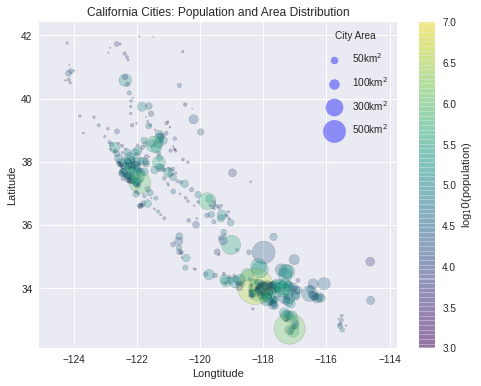

In [ ]:
lat, lon, population, area = Cali['latd'], Cali['longd'],Cali['population_total'],Cali['area_total_km2']

#Plot using Pyplot API
plt.style.use('seaborn')
plt.figure(2, figsize=(8, 6))
plt.scatter(lon, lat, c=np.log10(population), s=area, cmap='viridis', edgecolor='k',alpha=0.3)
plt.xlabel('Longtitude')
plt.ylabel('Latitude')
plt.colorbar(label='log$_10$(population)')
plt.axis('equal')
plt.clim(3,7) #giới hạn cho colorbar
plt.title('California Cities: Population and Area Distribution')

#Create a legend for cities size
area_range = [50,100,300,500]
for area in area_range:
  plt.scatter([],[],s=area,label=str(area)+'km$^2$',c='b', alpha=0.4)
plt.legend(labelspacing=1,title='City Area')
;

##Word Cloud

In [ ]:
pip install wordcloud

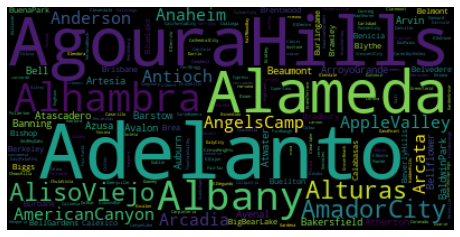

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(Cali['city'])
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()